## **Analyzing "teams"**

This dataset contains personal info about players like college of origin, weight and height, position, birth date and death date. In this dataset we can analyze the different colleges origins of players, average heighst and weights, number of players in each position, etc. 

The analysis will focus on exploring:

- **Playoff Consistency**: Analyze which teams are frequent participants in the playoffs
- **Team Win Trends**: Examine how each team’s win record evolves over the years.
- **Team Off and Def Efficiency**: Examine the correlation between better efficiency and the presence in the playoffs.
- **Attendance and Performance Correlation**: Explore the relationship between attendance, team's arena, win percentage, and overall performance.
- **Wins vs. Losses for Playoff Teams**: Determine whether a higher number of wins increases the likelihood of playoff qualification.


### **Introduction to the Dataset**

This section provides a brief analysis of the dataset, highlighting its key metrics and characteristics. 

In [30]:
import importlib
import sys
import os
sys.path.append('..')
import pandas as pa
pa.set_option('display.max_rows', None)

from data_scripts import _store_data as sd;
from data_scripts import teams_data as td;
from pathlib import Path

importlib.reload(td)

sd.load_data(Path("../data"))
display(sd.df_info_table(sd.teams_df))

,Non-Null Count,Null Count,Missing %,Dtype,Unique Values
year,142,0,0.00,int64,10
tmID,142,0,0.00,object,20
franchID,142,0,0.00,object,18
confID,142,0,0.00,object,2
divID,0,142,100.00,float64,0
rank,142,0,0.00,int64,8
playoff,142,0,0.00,object,2
firstRound,80,62,43.66,object,2
semis,40,102,71.83,object,2
finals,20,122,85.92,object,2


As shown in the **table**, there are **some missing values** across the `divID`, `firstRound`, `semis`, and `finals` columns, the `divID` column can be removed. The **null values** in the remaining columns are expected, as not all teams advance through every round. However, there is a noticeable **inconsistency** — while **80 teams** participate in the **first round**, only **38** reach the **semifinals**, which is not logically possible since typically half of the teams advance from each round. Therefore, some **data pre-processing** will be required to address this issue.



### **Cleaning**

#### Dropping Columns with Unique Values

In [ ]:
del sd.teams_df['lgID']
del sd.teams_df['seeded']
del sd.teams_df['tmORB']
del sd.teams_df['tmDRB']
del sd.teams_df['tmTRB']
del sd.teams_df['opptmORB']
del sd.teams_df['opptmDRB']
del sd.teams_df['opptmTRB']

Since the columns `lgID`,`seeded` ,`tmORB` ,`tmDRB` ,`tmTRB` ,`opptmORB` ,`opptmDRB` ,`opptmTRB` contain only one unique value, they can be removed as it will not affect the analysis of the dataset.

#### Fixing Missing Values in the `semis` Column

In [31]:
td.fix_missing_values()

Using the information available in the **series_post** dataset, we can **complete** and **correct** the missing values in the `semis` column.

### **EDA**

#### Teams Playoffs Appearances

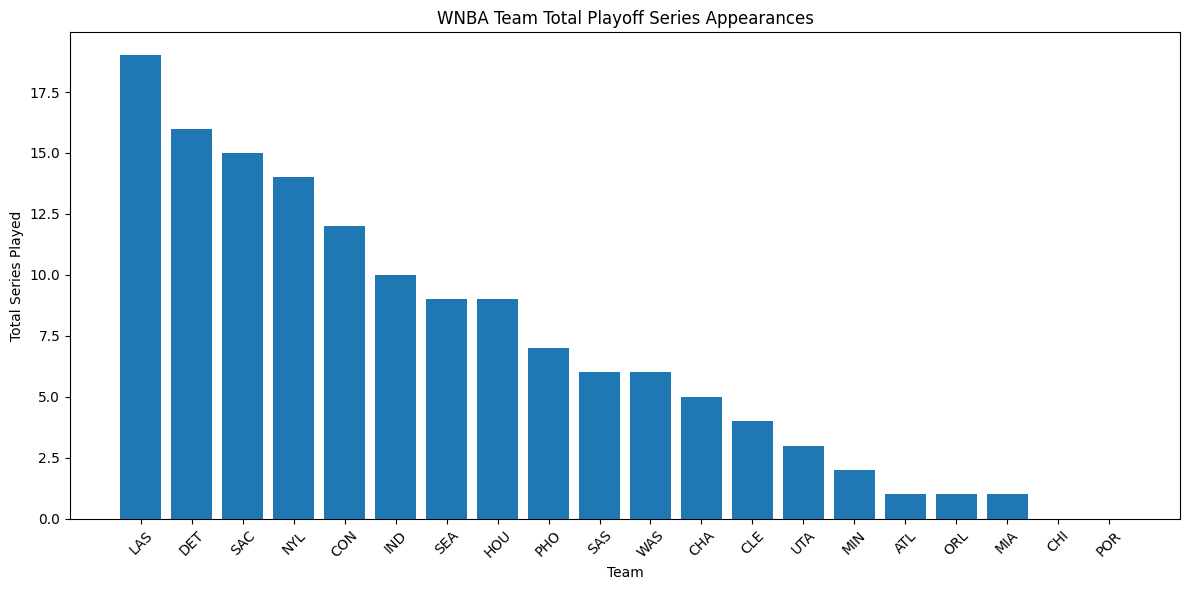

In [32]:
td.teams_series_appearances()

This **bar chart** shows a clear **disparity in historical success** across the league by displaying the **Total Playoff Series Appearances** for each team.  

The **Las Vegas Aces (LAS)**, **Detroit Shock (DET)**, and **Sacramento Monarchs (SAC)** lead with **over 15 appearances**, demonstrating **sustained historical competitiveness**.  

In contrast, many teams at the bottom of the chart, such as **ATL, ORL, MIA, CHI, and POR**, have **minimal (one or zero) total appearances**, which highlights that **long-term competitive success** is concentrated within a **small handful of historically dominant franchises**.


#### Teams Win Trend

In [33]:
td.teams_regular_season_rank_trend()

In [34]:
td.teams_regular_season_wins_trend()

This **final plot**, a **time-series line graph** showing the **number of regular season wins per team** and the **ranks of each conference** over **10 years**, demonstrates a **high degree of competitive volatility** and **parity within the league**.  

While some teams briefly achieve **peaks of around 25–27 wins**, no single team maintains **dominance**, and most lines show **dramatic year-to-year swings**, with several teams experiencing **drops from high win totals to single-digit lows**.  

This constant **fluctuation** illustrates a **lack of sustained excellence** across the league and suggests that the **competitive landscape** is **highly unstable** and subject to **frequent turnover**.


#### Team Off and Def Efficiency

In [35]:
td.efficiency_scatter()

This **scatter plot** shows that **playoff teams (red)** cluster in the **upper-left area**, demonstrating **strong offensive efficiency (50–100 range)** combined with **elite defense (below 50)**. Success requires **balance in both metrics**, with very few playoff teams showing **defensive ratings above 80**.  

**Non-playoff teams (blue)** are more **scattered**, typically **weak in at least one dimension**. Most fall **below 60** in **offensive efficiency** or **above 50** in **defensive rating**, suggesting that **excelling in just one area** isn't enough to **reach the postseason**.


#### Attendance and Performance Correlation

In [36]:
td.correlation_heatmap()

All performance metrics—`stat_score`, `win_percentage`, `overall_performance`, and `rank_score`—exhibit a **very strong positive correlation** with one another (coefficients ranging from $0.73$ to $1.0$). This confirms that these variables are highly redundant and all measure the same underlying success of a team.

Crucially, **Attendance (`attend`) shows a minimal positive correlation** with all performance metrics, with coefficients ranging from a very low $0.07$ to $0.19$. This minimal correlation statistically validates that **on-field performance is largely decoupled from stadium attendance**, suggesting non-performance factors like market size, loyalty, and gameday experience are the primary drivers of attendance.

In [37]:
td.attendance_vs_performance()

There is **no strong, clear linear correlation** between **attendance** and any of the **performance metrics**, as points are widely scattered.  

While the majority of data clusters in the **100k–200k attendance range**, **high attendance** is achieved by teams across a **broad spectrum of performance levels**, indicating that **factors other than immediate team performance** likely drive **stadium attendance**.


#### Wins vs. Losses for Playoff Teams

In [38]:
td.playoff_comparison()

This **bar plot** clearly illustrates the **average performance difference** between **playoff** and **non-playoff teams**.  

Teams that did **not make the playoffs (N)** averaged significantly more **losses (approx. 20.5)** than **wins (approx. 12.5)**, resulting in a **losing record**.  

Conversely, teams that **did make the playoffs (Y)** averaged significantly more **wins (approx. 20)** than **losses (approx. 13.5)**, demonstrating a **strong winning record**.  

The plot confirms the intuitive expectation that a team's ability to **accumulate more wins than losses on average** is the **primary factor** distinguishing **playoff qualifiers** from **non-qualifiers**.


### **EDA Conclusions**

A **small number of teams**, including **LAS**, **DET**, and **SAC**, dominate historically with **15+ playoff appearances**, while many others have **minimal postseason presence**, showing that **long-term success** is concentrated among a **few franchises**.

**Recent performance** over **10 years** shows **high volatility**, with teams experiencing **dramatic year-to-year swings** and no franchise maintaining **sustained dominance**, indicating an **unstable competitive landscape**.

The analysis reveals that playoff teams consistently demonstrate a balance of **strong offensive efficiency (50–100)** and **elite defense (below 50)**, clustering in the upper-left of the scatter plot. Non-playoff teams, by contrast, are more scattered and typically weak in at least one dimension, suggesting that excelling in a single metric is insufficient for postseason qualification. This emphasizes that **balanced team performance** is a key driver of success.

**Core performance metrics** (**stat_score**, **win_percentage**, **overall_performance**, **rank_score**) are **highly correlated**, capturing the **same measure of team success**, whereas **attendance** is largely **independent of performance**, suggesting factors like **market size** and **fan loyalty** drive **crowd numbers** more than **on-field results**.

Finally, **playoff teams** consistently show **winning records**, while **non-playoff teams** average more **losses than wins**, confirming that **overall team performance** is the **main determinant** of **postseason qualification**.


Some teams have an equal number of wins for this cases there are tiebreakers. To know what are the tiebreakers we searched and the information that we got is that first the head to head between the tied teams is the first tiebreaker and then the win percentage versus teams with a win rate above 50% was the second tiebreaker. Since we don't have the information about the games that occured in the regular season we can't know which teams won the tiebreakers.

In [39]:
sd.save_data(Path("../data"))